**Project Title: Exploratory Data Analysis of Palmer Penguins Dataset**

Objective
Perform a comprehensive EDA to uncover patterns, relationships, and insights in the penguins dataset using Python and Seaborn.



**Step 1: Load the Dataset**

We’ll use the penguins dataset from Seaborn, which contains measurements of three penguin species.

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
penguins = sns.load_dataset('penguins')

# Display the first 5 rows
print(penguins.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


**Step 2: Basic Data Exploration**

Dataset Information

In [2]:
# Check dataset shape, columns, and data types
print("Shape:", penguins.shape)
print("\nColumns:", penguins.columns)
print("\nData Types:\n", penguins.dtypes)

Shape: (344, 7)

Columns: Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

Data Types:
 species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


**Summary Statistics**

In [3]:
# Numerical features
print(penguins.describe())

# Categorical features
print(penguins[['species', 'island', 'sex']].describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000
       species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  Male
freq       152     168   168


**Step 3: Handle Missing Values**

In [4]:
# Check missing values
print(penguins.isnull().sum())

# Drop rows with missing values (or use imputation)
penguins_clean = penguins.dropna()

# Verify
print("Missing values after cleaning:", penguins_clean.isnull().sum().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64
Missing values after cleaning: 0


**Step 4: Univariate Analysis**

Numerical Features

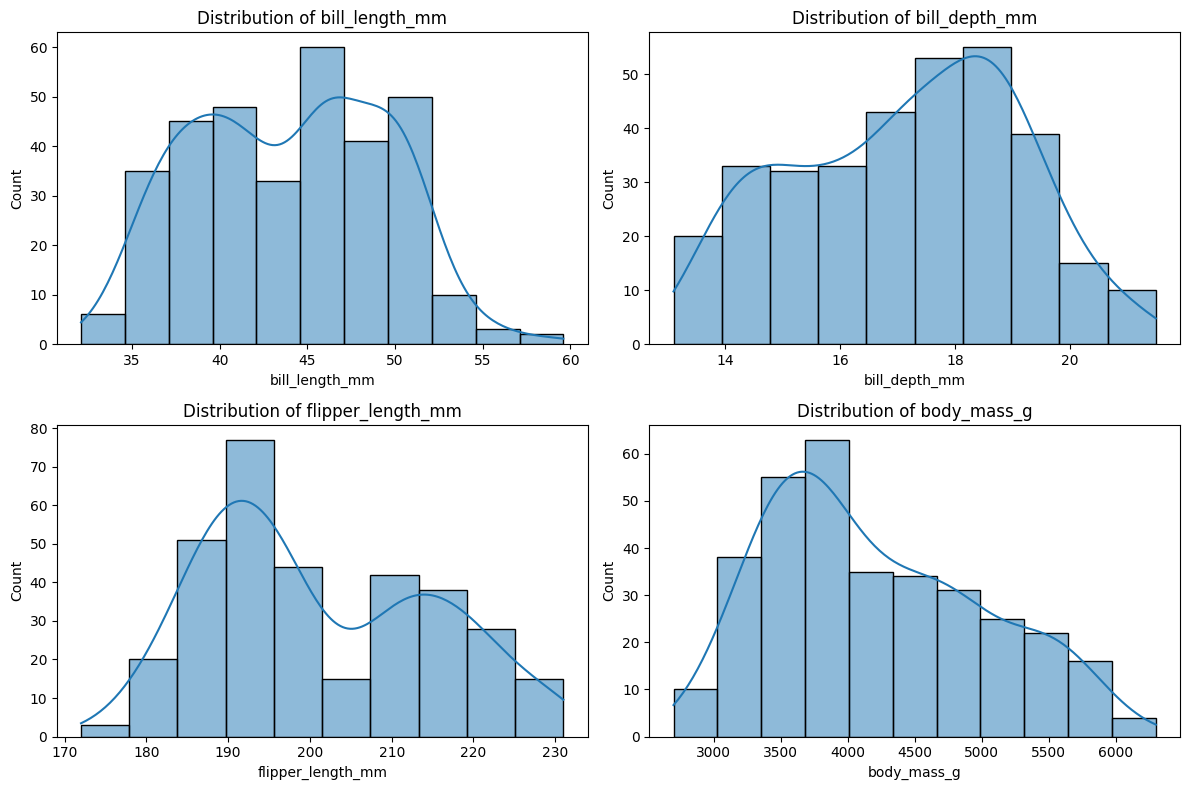

In [5]:
# Plot distributions for numerical features
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.histplot(penguins_clean[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Categorical Features**

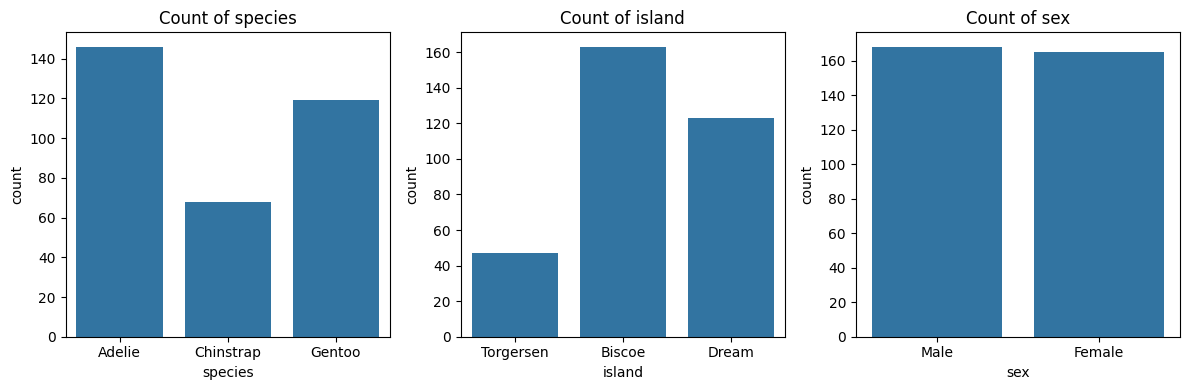

In [6]:
# Plot counts for categorical features
cat_cols = ['species', 'island', 'sex']
plt.figure(figsize=(12, 4))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=penguins_clean, x=col)
    plt.title(f'Count of {col}')
plt.tight_layout()
plt.show()

**Step 5: Bivariate Analysis**

Numerical vs. Numerical

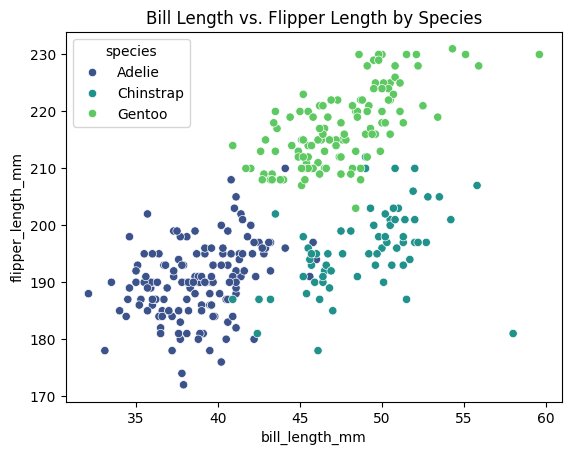

In [7]:
# Scatter plot: Bill Length vs. Flipper Length
sns.scatterplot(
    data=penguins_clean,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    palette='viridis'
)
plt.title('Bill Length vs. Flipper Length by Species')
plt.show()

**Numerical vs. Categorical**

<ipython-input-8-16741ababf90>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


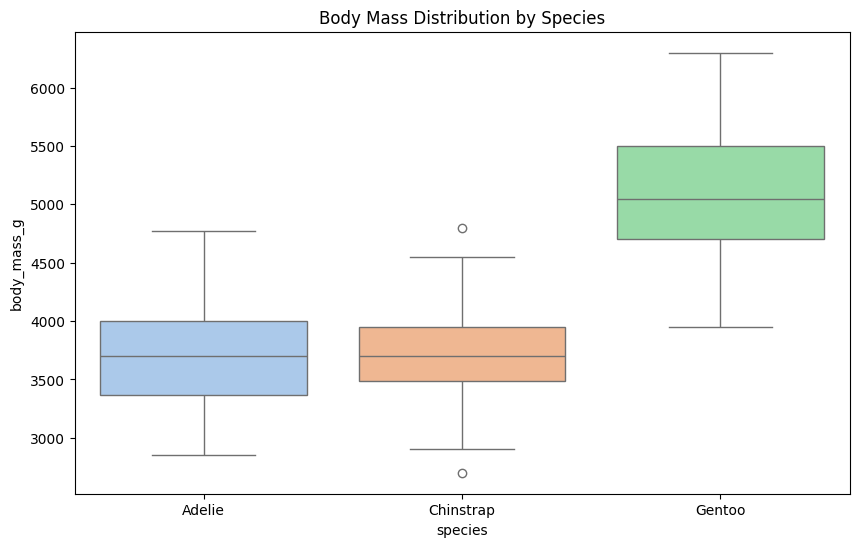

In [8]:
# Boxplot: Body Mass by Species
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=penguins_clean,
    x='species',
    y='body_mass_g',
    palette='pastel'
)
plt.title('Body Mass Distribution by Species')
plt.show()

**Step 6: Multivariate Analysis**

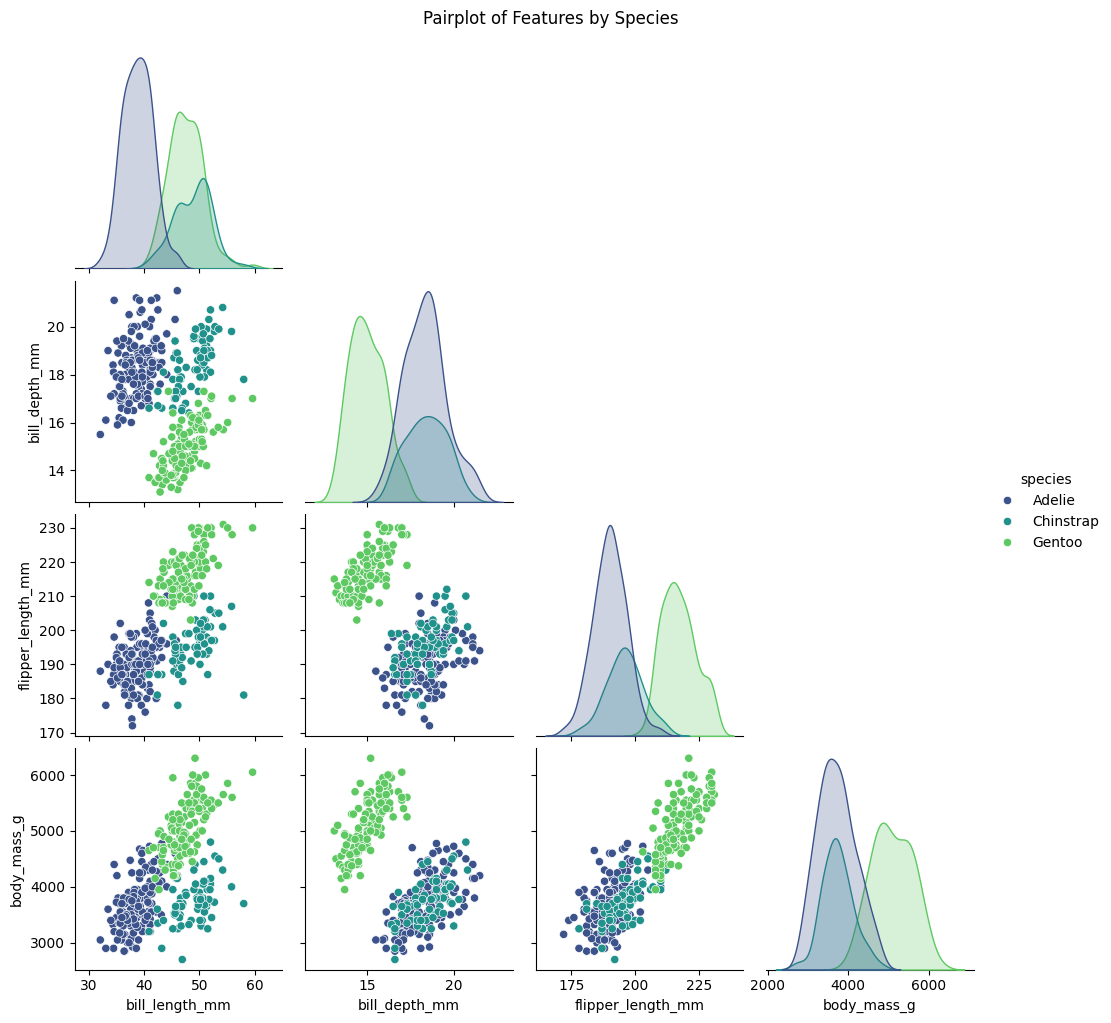

In [9]:
# Pairplot with hue for species
sns.pairplot(
    penguins_clean,
    hue='species',
    palette='viridis',
    corner=True  # Show only lower triangle
)
plt.suptitle('Pairplot of Features by Species', y=1.02)
plt.show()

**Step 7: Correlation Analysis**

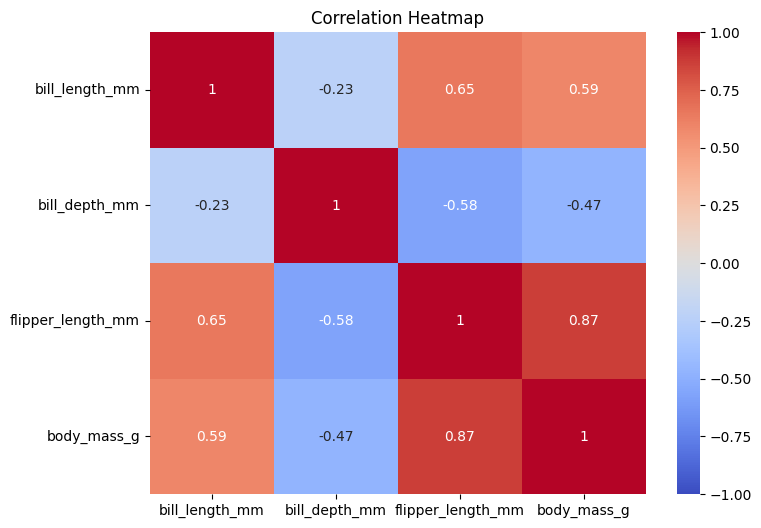

In [10]:
# Heatmap of correlations
corr_matrix = penguins_clean[num_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1
)
plt.title('Correlation Heatmap')
plt.show()

**Step 8: Advanced Insights**

Species Comparison

In [11]:
# Grouped means by species
species_stats = penguins_clean.groupby('species')[num_cols].mean()
print(species_stats)

           bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
species                                                                 
Adelie          38.823973      18.347260         190.102740  3706.164384
Chinstrap       48.833824      18.420588         195.823529  3733.088235
Gentoo          47.568067      14.996639         217.235294  5092.436975


**Sex Differences**

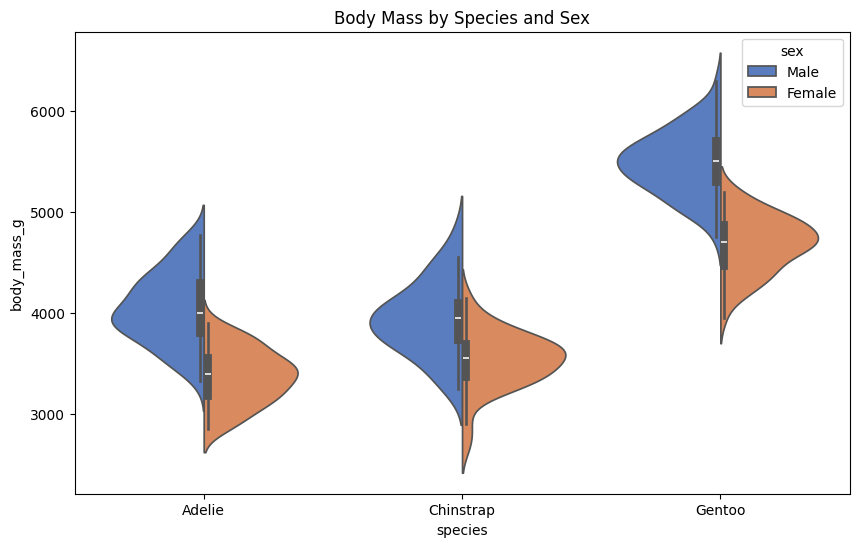

In [12]:
# Body mass by sex and species
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=penguins_clean,
    x='species',
    y='body_mass_g',
    hue='sex',
    split=True,
    palette='muted'
)
plt.title('Body Mass by Species and Sex')
plt.show()

**Step 9: Key Findings Summary**

**Species Distribution:** Adelie is the most common species.

**Body Mass:** Male penguins are heavier than females.

**Correlations:** Flipper length and body mass are strongly correlated (
r
=
0.87
r=0.87).

**Bill Dimensions:** Gentoo penguins have longer bills compared to Adelie and Chinstrap.
